In [1]:
import scvelo as scv
import pandas as pd 
import numpy as np
from anndata import AnnData
import loompy
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.patches as mpatches
import pickle
import os
# import mnnpy
import leidenalg
# from sknetwork.clustering import Louvain, BiLouvain, modularity, bimodularity
# from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from scipy import sparse
from IPython.display import SVG
# import community
# import gseapy as gp
# import autograd
# from autograd import grad, jacobian
from sklearn.linear_model import LinearRegression
from scipy import stats,signal
# from community import community_louvain
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cross_decomposition import PLSRegression

from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scanpy
# from filter_dispersion import filter_dispersion
from scipy.sparse import issparse
from scvelo.preprocessing.utils import get_mean_var,materialize_as_ndarray
import dynamo as dyn
from dynamo.preprocessing import Preprocessor
from scipy.sparse import csr_matrix
from RKHS import SparseVFC
from RKHS import Jacobian_rkhs_gaussian

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
data_path='../data/'
result_path='result/'

In [4]:
adata=dyn.read_h5ad(result_path+'DG_dyn.h5ad')

In [5]:
dyn.pp.recipe_monocle(adata,keep_filtered_genes=False,keep_filtered_cells=True,num_dim=30)
# adata

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----? dynamo detects your data is size factor normalized and/or log transformed. If this is not right, plese set `normalized = False.
|-----> filtering cells...
|-----> 3171 cells passed basic filters.
|-----> filtering gene...
|-----> 1309 genes passed basic filters.
|-----> calculating size factor...
|-----? only 1309 genes passed basic filtering, but you requested 2000 genes for feature selection. Try lowering the gene selection stringency: {'min_expr_cells': 0, 'min_expr_avg': 0, 'max_expr_avg': inf, 'svr_gamma': None, 'winsorize': False, 'winsor_perc': (1, 99.5), 'sort_inverse

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False


estimating gamma: 100%|████████████████████| 1960/1960 [00:19<00:00, 102.90it/s]


|-----> retrieve data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [UMAP] completed [0.0007s]
|-----------> plotting with basis key=X_pca
|-----------> skip filtering ClusterName by stack threshold when stacking color because it is not a numeric type


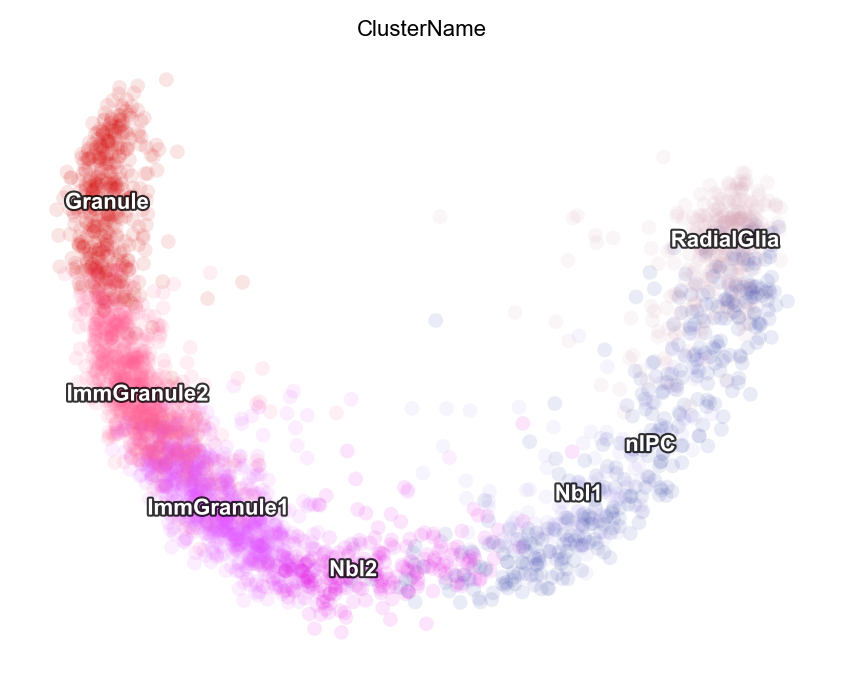

In [6]:
dyn.tl.dynamics(adata,assumption_mRNA='kinetic')
dyn.tl.reduceDimension(adata)
dyn.pl.pca(adata, color='ClusterName',pointsize=0.1)

In [7]:
dyn.tl.cell_velocities(adata, method='fp', basis='pca',n_neighbors=30,correct_density=True)# 

Using existing fp_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.2872s]
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


AnnData object with n_obs × n_vars = 3184 × 1960
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'frac', 'ntr', 'use_for_dynamics', 'use_for_transition', 'use_for_pca'
    uns: 'ClusterName_colors', 'PCs', 'cell_phase_genes', 'cell_phase_order', 'dynamics', 'explained_variance_ratio_', 'feature_selection

In [8]:
dyn.vf.VectorField(adata,basis='pca')

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [SparseVFC] completed [0.1119s]
|-----> [VectorField] completed [0.1569s]


|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected
|-----------> plotting with basis key=X_pca
|-----------> skip filtering ClusterName by stack threshold when stacking color because it is not a numeric type


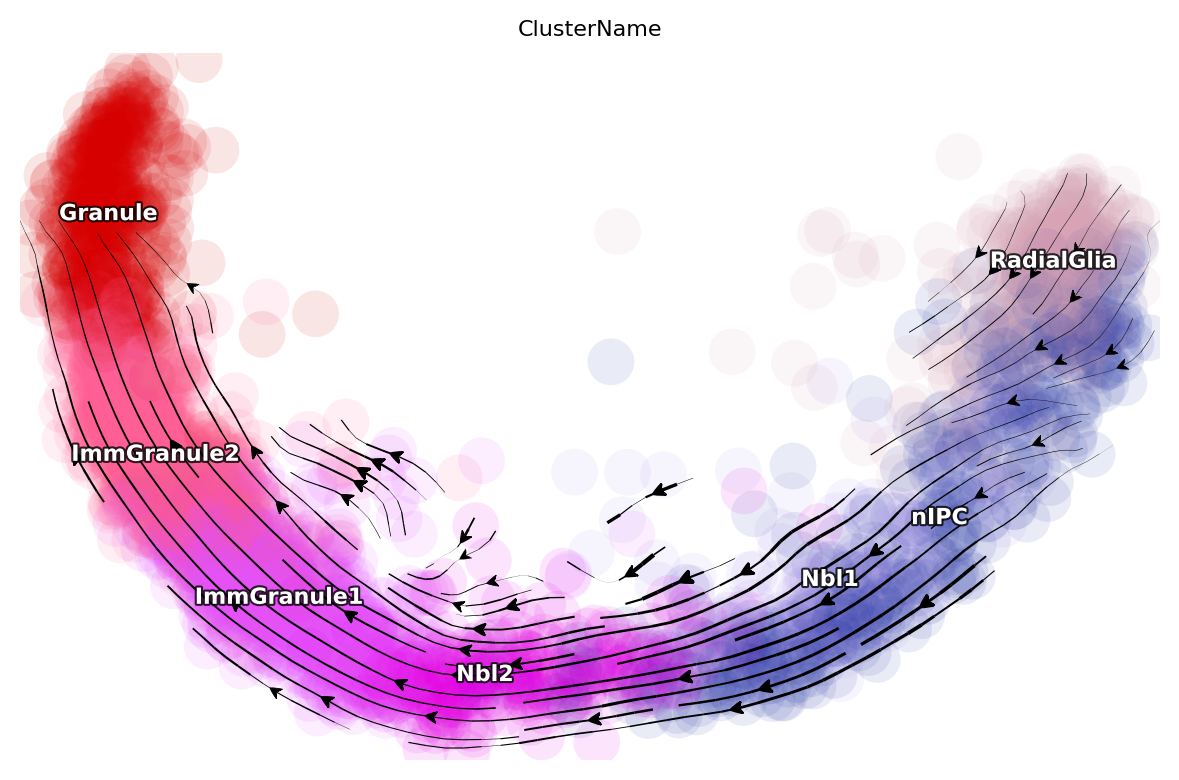

In [9]:
dyn.pl.streamline_plot(adata,basis='pca',color='ClusterName')

In [10]:
dyn.vf.jacobian(adata)#,regulators=adata.var.index.values

AnnData object with n_obs × n_vars = 3184 × 1960
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'jacobian_det_pca'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'frac', 'ntr', 'use_for_dynamics', 'use_for_transition', 'use_for_pca'
    uns: 'ClusterName_colors', 'PCs', 'cell_phase_genes',

In [12]:
J=adata.uns['jacobian_pca']['jacobian']
print(J.shape)
Jij_mean=np.mean(J.reshape(J.shape[0]*J.shape[1],J.shape[2]),axis=0)
Jij_mean.shape

J_inter_pca=[]
for i in range(J.shape[2]):
    J_inter_pca.append(np.sum(np.tril(J[:,:,i])+np.tril(J[:,:,i].T)))

(30, 30, 3184)


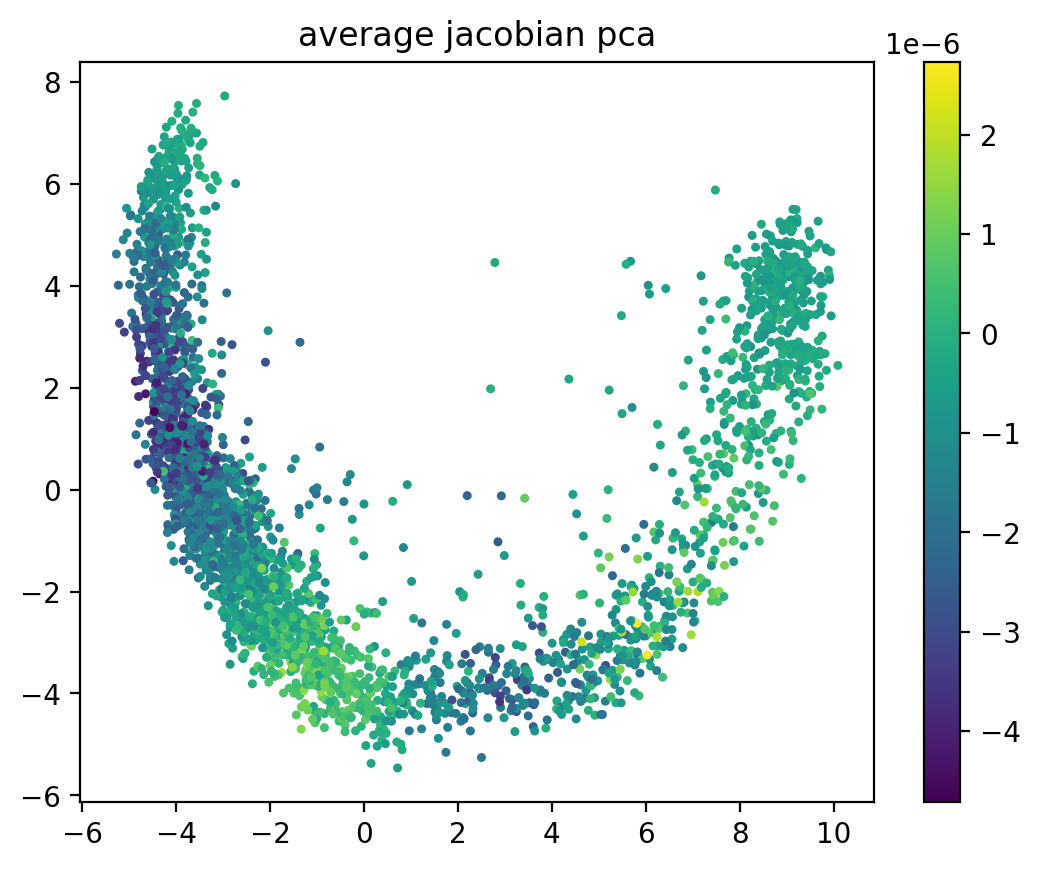

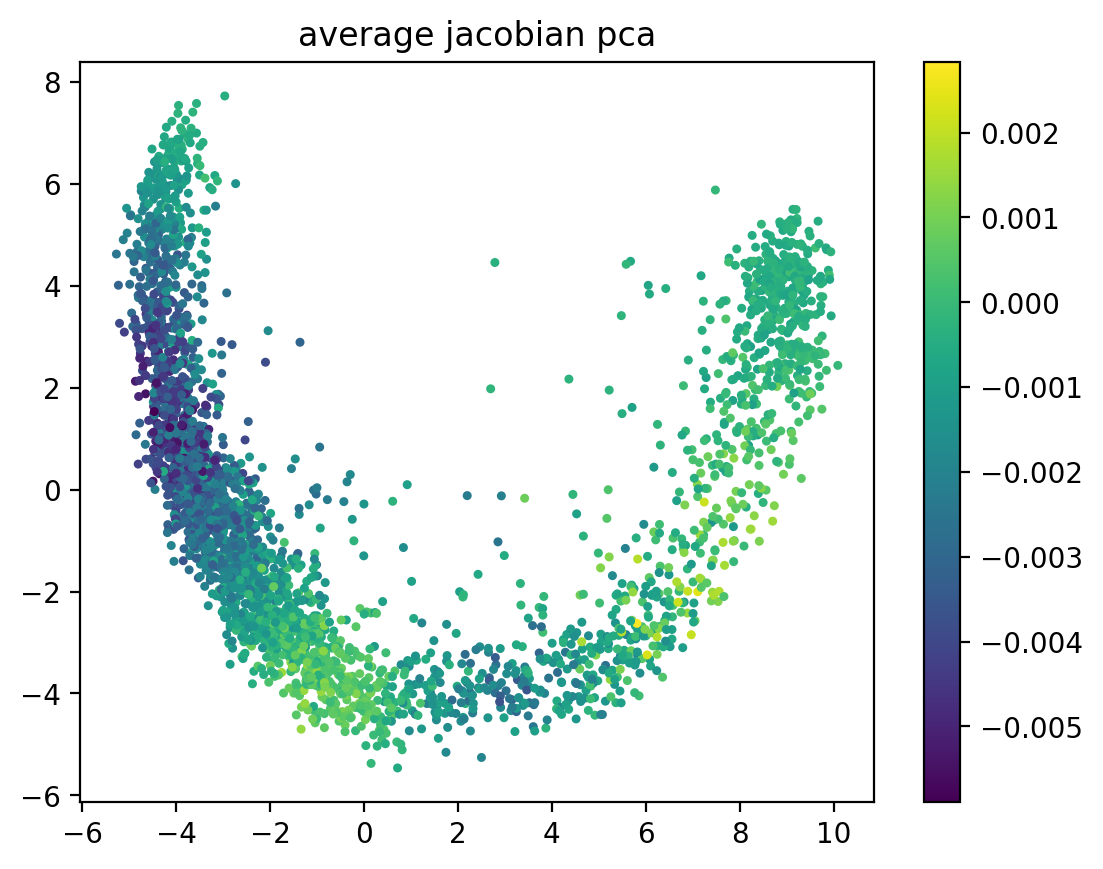

In [13]:
plt.scatter(adata.obsm['X_pca'][:,0],adata.obsm['X_pca'][:,1],s=5,c=Jij_mean)
plt.title('average jacobian pca')
plt.colorbar()
plt.show()

plt.scatter(adata.obsm['X_pca'][:,0],adata.obsm['X_pca'][:,1],s=5,c=J_inter_pca)
plt.title('average jacobian pca')
plt.colorbar()
plt.show()

In [14]:
J_ori_mean=[]
J_ori_std=[]
for i in range(J.shape[2]):
    J_ori=np.matmul(np.matmul(adata.uns['PCs'],J[:,:,i]),adata.uns['PCs'].T)
    J_ori_mean.append(np.mean(np.abs(J_ori)))
    J_ori_std.append(np.std(J_ori))

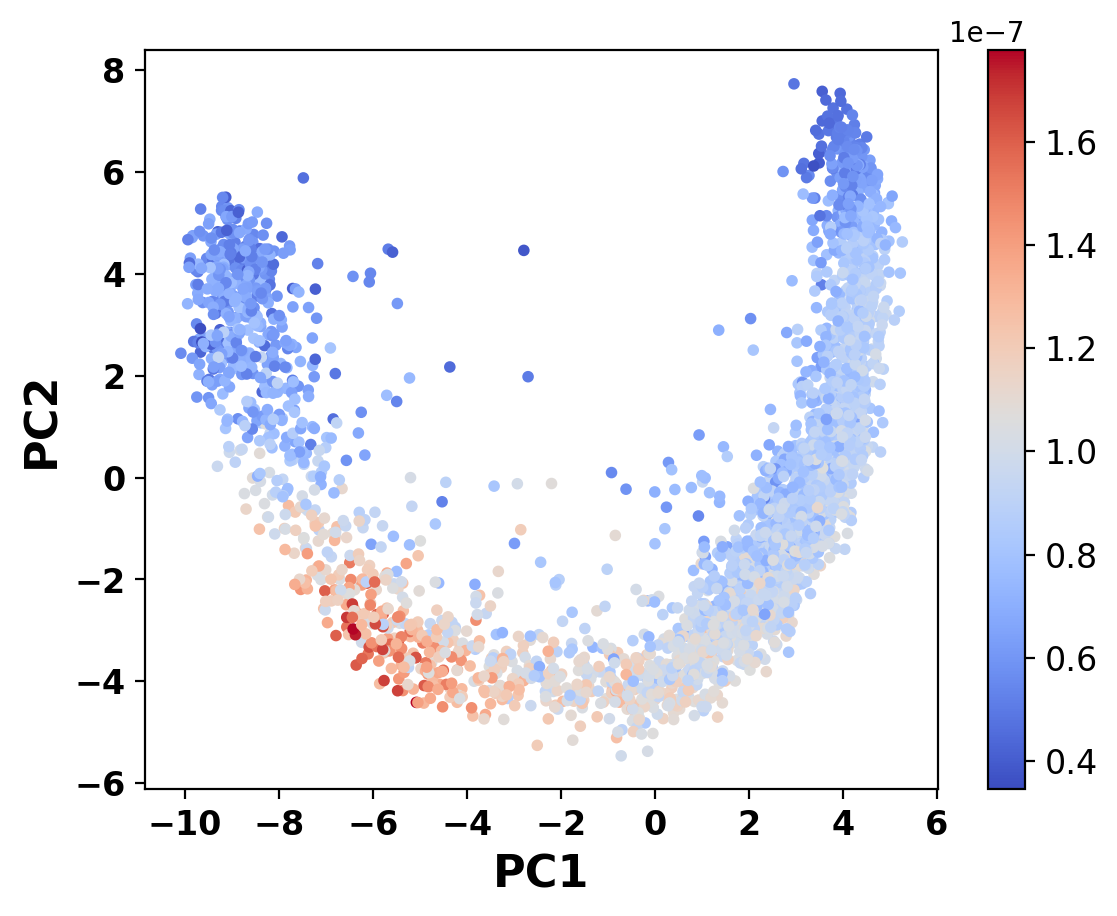

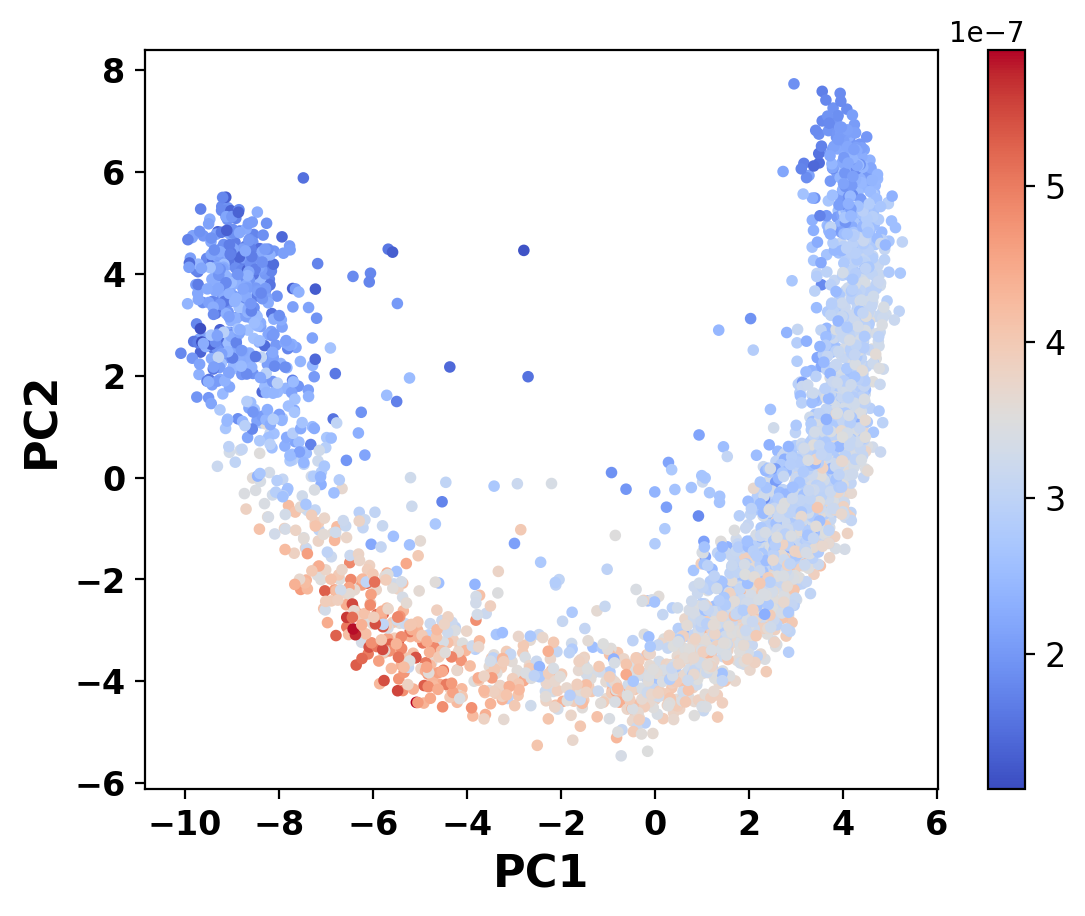

In [16]:
plt.scatter(-adata.obsm['X_pca'][:,0],adata.obsm['X_pca'][:,1],s=10,c=J_ori_mean,cmap=plt.cm.coolwarm)
plt.xlabel('PC1',fontsize=16,fontweight='bold')
plt.ylabel('PC2',fontsize=16,fontweight='bold')

plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
clb=plt.colorbar()
clb.ax.tick_params(labelsize=12)
plt.savefig(result_path+'DG_abs_mean_J.png',dpi=300)
plt.show()

plt.scatter(-adata.obsm['X_pca'][:,0],adata.obsm['X_pca'][:,1],s=10,c=J_ori_std,cmap=plt.cm.coolwarm)
plt.xlabel('PC1',fontsize=16,fontweight='bold')
plt.ylabel('PC2',fontsize=16,fontweight='bold')

plt.xticks(fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')
clb=plt.colorbar()
clb.ax.tick_params(labelsize=12)
plt.savefig(result_path+'DG_std_J.png',dpi=300)
plt.show()